# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from api_keys import api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace spaces with %20 to create url correctly 
 
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []


# Specify the file to write to
output_path = os.path.join("..", "output", "newcities.csv")

# Open the file using "write" mode. Specify the variable to hold the contents

with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=' ')

   
    
    # Starting URL for API call
    url = 'http://api.openweathermap.org/data/2.5/forecast?'


    i = 0
    set_number = 1

    for city in cities:
        i = i + 1
        
        csvwriter.writerow(["Processing Record", f'{i}', "of Set", f'{set_number}',f'{city}'])
        print(f"Processing Record {i} of Set {set_number} | {city}")
    
       
        try:
            # Get json
            res = requests.get(f'{url}q={city}&APPID={api_key}').json()
            # Create lists for Data Frame
            city_name.append(res['city']['name'])
            cloudiness.append(res['list'][0]['clouds']['all'])
            country.append(res['city']['country'])
            date.append(res['list'][0]['dt'])
            humidity.append(res['list'][0]['main']['humidity'])
            lat.append(res['city']['coord']['lat'])
            lng.append(res['city']['coord']['lon'])
            temp_max.append(res['list'][0]['main']['temp_max'])
            wind_speed.append(res['list'][0]['wind']['speed'])


        # Skip if no match found
        except:
            csvwriter.writerow(["City not found. Skipping..."])
            print("City not found. Skipping...")   
            

        if i == 50:
            csvwriter.writerow(["Sleeping.."])
            print('Sleeping...')
            time.sleep(40)
            i = 0
            set_number = set_number + 1

    csvwriter.writerow(["-----------------------------"])
    csvwriter.writerow(["Data Retrieval Complete "])
    csvwriter.writerow(["-----------------------------"])
    
    print("-----------------------------")
    print("Data Retrieval Complete ")
    print("-----------------------------")


    dataset = pd.DataFrame({'City': city_name,
                                'Cloud': cloudiness,
                                'Country': country,
                                'Date': date,
                                'Humidity': humidity,
                                'Lat': lat,
                                'Lon': lng,
                                'Max Temp': temp_max,
                                'Wind Speed': wind_speed
                                                         })

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | antropovo
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | batemans bay
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | vanavara
Processing Record 10 of Set 1 | santa isabel
Processing Record 11 of Set 1 | murray bridge
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | saint-augustin
Processing Record 16 of Set 1 | asfi
City not found. Skipping...
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | the valley
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | illoqqortoormiut
City 

Processing Record 31 of Set 4 | oga
Processing Record 32 of Set 4 | lompoc
Processing Record 33 of Set 4 | ginda
Processing Record 34 of Set 4 | killybegs
Processing Record 35 of Set 4 | acapulco
Processing Record 36 of Set 4 | lamu
Processing Record 37 of Set 4 | iqaluit
Processing Record 38 of Set 4 | nara
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | zalantun
Processing Record 41 of Set 4 | ciudad bolivar
Processing Record 42 of Set 4 | severodvinsk
Processing Record 43 of Set 4 | acari
Processing Record 44 of Set 4 | saint-joseph
Processing Record 45 of Set 4 | mocuba
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | masvingo
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | atuona
Sleeping...
Processing Record 1 of Set 5 | henties bay
Processing Record 2 of Set 5 | kargasok
Processing Record 3 of Set 5 | micoud
Processing Record 4 of Set 5 | bargal
City not found. Skipping

Processing Record 18 of Set 8 | kismayo
City not found. Skipping...
Processing Record 19 of Set 8 | tura
Processing Record 20 of Set 8 | inhambane
Processing Record 21 of Set 8 | banjar
Processing Record 22 of Set 8 | mae chan
Processing Record 23 of Set 8 | bengkulu
City not found. Skipping...
Processing Record 24 of Set 8 | matara
Processing Record 25 of Set 8 | ambilobe
Processing Record 26 of Set 8 | muroto
Processing Record 27 of Set 8 | svetlyy
City not found. Skipping...
Processing Record 28 of Set 8 | awjilah
Processing Record 29 of Set 8 | nizhnevartovsk
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | mokhsogollokh
Processing Record 32 of Set 8 | celestun
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | tonj
City not found. Skipping...
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | ixtapa
Processing Record 37 of Set 8 | homer
Processing Record 38 of Set 8 | grand river south east
City not found. Skipping...
P

Processing Record 49 of Set 11 | murgab
Processing Record 50 of Set 11 | ovalle
Sleeping...
Processing Record 1 of Set 12 | qasigiannguit
Processing Record 2 of Set 12 | flinders
Processing Record 3 of Set 12 | natal
Processing Record 4 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 5 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 6 of Set 12 | alice springs
Processing Record 7 of Set 12 | sinjai
Processing Record 8 of Set 12 | ponta delgada
Processing Record 9 of Set 12 | doctor arroyo
Processing Record 10 of Set 12 | cabrobo
Processing Record 11 of Set 12 | beringovskiy
Processing Record 12 of Set 12 | taksimo
Processing Record 13 of Set 12 | kovdor
Processing Record 14 of Set 12 | varberg
Processing Record 15 of Set 12 | buon me thuot
City not found. Skipping...
Processing Record 16 of Set 12 | micco
Processing Record 17 of Set 12 | nyandoma
Processing Record 18 of Set 12 | ambovombe
Processing Record 19 of Set 12 | longyan
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
dataset.to_csv('../Output/WeatherPyOut.csv')

In [54]:
dataset

City  Cloud Country        Date  Humidity      Lat  \
0              Rikitea     63      PF  1567911600        63 -23.1203   
1            Antropovo     43      RU  1567911600        83  55.2481   
2          Port Alfred      0      ZA  1567911600        26 -33.5906   
3            Busselton     36      AU  1567911600        80 -33.6445   
4             Hermanus      0      ZA  1567911600        54 -34.4176   
5           Georgetown      0      GY  1567911600        86   6.8026   
6         Batemans Bay      0      AU  1567911600        28 -35.7073   
7       Saint-Philippe     71      CA  1567911600        76  45.3584   
8             Vanavara     30      RU  1567911600        63  60.3452   
9         Santa Isabel      0      MX  1567911600        35  32.6293   
10       Murray Bridge     45      AU  1567911600        82 -35.1200   
11               Alofi      0      NU  1567911600        73 -19.0596   
12          Nanortalik      0      GL  1567911600        74  60.1432   
13             Ushuaia    100      AR  1567911600        89 -54.8070   
14      Saint-Augustin     97      CA  1567911600        98  45.6256   
15            Khatanga     81      RU  1567911600        77  71.9801   
16              Hobart      1      AU  1567911600        37 -42.8826   
17             Bubaque     92      GW  1567911600        75  11.2833   
18          The Valley     83      AI  1567911600        74  18.2170   
19         Tuktoyaktuk     89      CA  1567911600        69  69.4440   
20              Dikson     99      RU  1567911600        93  73.5069   
21               Bluff      0      AU  1567911600        14 -23.5800   
22           Esperance     12      AU  1567911600        77 -33.8583   
23             Mataura     88      NZ  1567911600        57 -46.1928   
24              Baykit      6      RU  1567911600        57  61.6784   
25             Qaanaaq    100      GL  1567911600        47  77.4840   
26           Carnarvon      0      ZA  1567911600        48 -30.9678   
27        San Patricio    100      PY  1567911600        51 -26.9767   
28             Requena     68      ES  1567911600        85  39.4885   
29          Brownfield     50      US  1567911600        44  33.1812   
..                 ...    ...     ...         ...       ...      ...   
526         Carutapera     89      BR  1567911600        94  -1.2017   
527            Conakry    100      GN  1567911600        87   9.5171   
528            Mponela      0      MW  1567911600        81 -13.5298   
529            Angoche     14      MZ  1567911600        77 -16.2293   
530               Nome      0      US  1567911600        82  30.0358   
531               Mitu      0      IR  1567911600        79  36.1986   
532               Ayan      0      IR  1567911600        89  38.2277   
533            Senanga      0      ZM  1567911600        62 -16.1041   
534              Nioro    100      GM  1567911600        93  13.7912   
535         Coahuayana    100      MX  1567911600        87  18.6201   
536             Linxia     30      CN  1567911600        45  35.5959   
537             Talaya    100      RU  1567911600        65  55.7870   
538             Tungor    100      RU  1567911600        65  53.3889   
539          Lunenburg     96      CA  1567911600        76  44.3775   
540               Alta      0      NO  1567911600        89  69.9669   
541              Jinka     99      ET  1567911600        93   5.7860   
542        Port-Gentil    100      GA  1567911600        88  -0.7194   
543           Tessaoua     88      NE  1567911600        64  13.7555   
544       San Fernando     67      TT  1567911600        84  10.2807   
545             Vanimo    100      PG  1567911600        74  -2.6741   
546            Fortuna      0      US  1567911600        89  40.5974   
547  Sao Joao da Barra     95      BR  1567911600        83 -21.6403   
548              Utiel     68      ES  1567911600        85  39.5681   
549         Mugur-Aksy     15      RU  1567911600        9

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

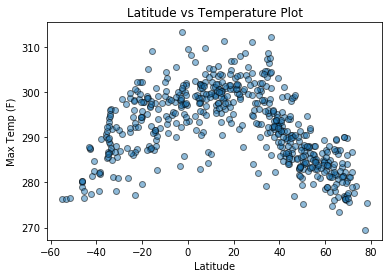

In [55]:
# Gather Columns
x1 = dataset['Lat']
y1 = dataset['Max Temp']

# Create Plot
plt.scatter(x1, y1, marker="o", edgecolor="black", alpha=0.50)
plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save Figure
plt.savefig("../Images/latlvstemp.png")

plt.show()

#### Latitude vs. Humidity Plot

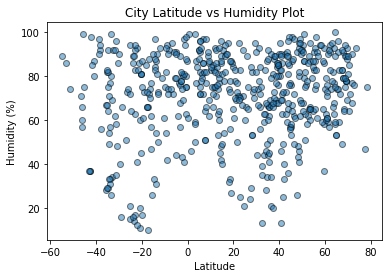

In [56]:

# Gather Columns
y2 = dataset['Humidity']

# Create Plot
plt.scatter(x1, y2, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig("../Images/latvshum.png")

plt.show()

#### Latitude vs. Cloudiness Plot

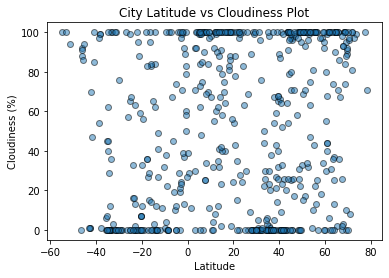

In [57]:
# Gather Columns
y3 = dataset['Cloud']


# Create Plot
plt.scatter(x1, y3, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save Figure
plt.savefig("../Images/latvscloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

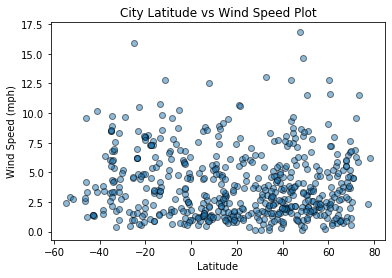

In [58]:
#Gather Columns
y4 = dataset['Wind Speed']

# Create plot
plt.scatter(x1, y4, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')


# Save Figure
plt.savefig("../Images/latvsWind.png")

plt.show()
